# Redes Complejas 

## Trabajo Práctico 1

In [77]:
# Imports

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

### `nutrientes.csv`

In [83]:
nutrients = []
# Levantamos columna de nutrientes
with open('datos_tp1/nutrients.csv','r') as file:
    lines = file.readlines()
    for line in lines:
        nutrient = line[:line.find(',')]
        if not nutrient in nutrients:
            nutrients.append(nutrient)
# Para cada nutriente, buscamos los alimentos y armamos el grafo en una lista ['source',['targets']]
alimentoss = []
with open('datos_tp1/nutrients.csv','r') as file:
    lines = file.readlines()
    for nutrient in nutrients:
        alimentos = [] # Alimentos que contienen un nutriente en particular
        for line in lines:
            if nutrient in line:
                alimentos.append(line[line.find(',')+1:-1])
        alimentoss.append(alimentos)
# Con la data, nos armamos un diccionario
data = dict(zip(nutrients,alimentoss))

In [85]:
Graph = nx.Graph(incoming_graph_data=data)

In [86]:
Graph.edges

EdgeView([('A', 'carrots'), ('A', 'eggs'), ('A', 'fatty fish'), ('A', 'green leafy vegs'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('B12', 'milk'), ('B12', 'beef'), ('B12', 'eggs'), ('B12', 'fatty fish'), ('B12', 'poultry'), ('B6', 'asparagus'), ('B6', 'beans'), ('B6', 'fatty fish'), ('B6', 'kidneys'), ('B6', 'liver'), ('B6', 'potatoes'), ('B6', 'beef'), ('B6', 'poultry'), ('C', 'carrots'), ('C', 'pumpkins'), ('C', 'tomatoes'), ('C', 'broccoli'), ('C', 'cheese'), ('C', 'liver'), ('C', 'nuts'), ('C', 'whole grains'), ('C', 'beans'), ('C', 'green leafy vegs'), ('C', 'kidneys'), ('C', 'milk'), ('C', 'potatoes'), ('C', 'shellfish'), ('C', 'yogurt'), ('Ca', 'broccoli'), ('Ca', 'cheese'), ('Ca', 'green leafy vegs'), ('Ca', 'milk'), ('Ca', 'yogurt'), ('Cu', 'liver'), ('Cu', 'nuts'), ('Cu', 'whole grains'), ('Cu', 'beans'), ('Cu', 'kidneys'), ('Cu', 'potatoes'), ('Cu', 'shellfish'), ('D', 'fatty fish'), ('D', 'milk'), ('D', 'mushrooms'), ('E', 'nuts'), ('E', 'seeds'), ('E', 'green le

#### (a) Representación del grafo

<ipython-input-90-e38ceaf06d2a>:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


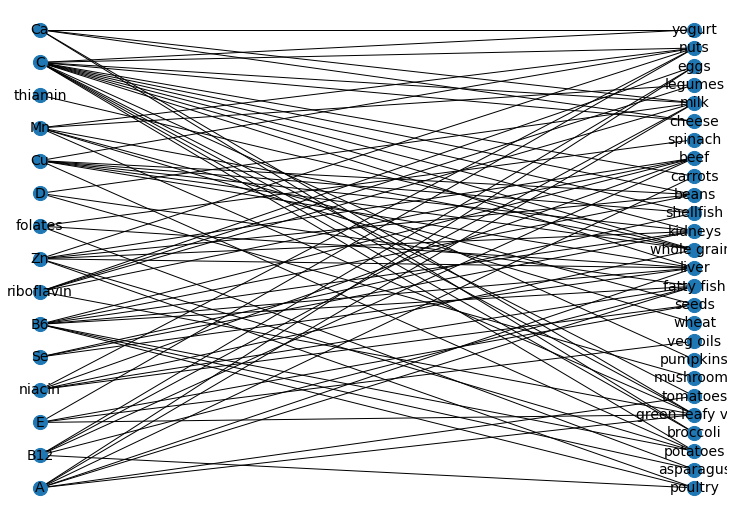

In [90]:
plt.figure(figsize=(10,7))
nx.draw(Graph,pos=nx.bipartite_layout(Graph,nodes=nutrients),
        with_labels=True,font_size=14,node_size=200)
plt.tight_layout()

#### (b) Gcc

In [92]:
giant = max(nx.connected_components(Graph), key=len)

In [93]:
giant

{'A',
 'B12',
 'B6',
 'C',
 'Ca',
 'Cu',
 'D',
 'E',
 'Mn',
 'Se',
 'Zn',
 'asparagus',
 'beans',
 'beef',
 'broccoli',
 'carrots',
 'cheese',
 'eggs',
 'fatty fish',
 'folates',
 'green leafy vegs',
 'kidneys',
 'legumes',
 'liver',
 'milk',
 'mushrooms',
 'niacin',
 'nuts',
 'potatoes',
 'poultry',
 'pumpkins',
 'riboflavin',
 'seeds',
 'shellfish',
 'spinach',
 'thiamin',
 'tomatoes',
 'veg oils',
 'wheat',
 'whole grains',
 'yogurt'}